## predicting heart disease using machine learning algorithms

### we are going to use the following approach:
    1- problem definition
    2- Data
    3- Evaluation
    4- Features
    5- modelling
    6- exprimentation

### 1- problem definition
Given clinical parameters about a patient, can we predict whether the patient has or has not a heart disease .
### 2- DATA
the original data came from the cleavland data from the uci machine learning repository
### 3- Evaluation
if we can reach 95% accuracy at predicting wheather the patient has or has not a heart disease during the proof of concept, we will pursue the project.
### 4- Features
create data dictionary
there is where we will get different information about the features
for example
> 1- age: age in years.\
> 2- sex:.\
> 3- chest pain: four types\
4- resting blood pressure\
5- serum cholesteral in mg/dl\
6- fasting blood sugar> 120 mg/dl\

### preparing the tools
we are going to use pandas, matplotlib, and numpy for data analysis and manipulation

In [2]:
# importing all the tools we need
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#models for scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


### Loading the data

In [3]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

### EDA (exploratory data analysis) 
> 1- what question(s) are we trying to solve \
2- what kind of data do we have and do we treat different types? \
3- what's missing from the data and how we deal with it \
4- where are the outliers and why should we care about them \
5- how can we add, change or remove features to get more out of our data 



In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

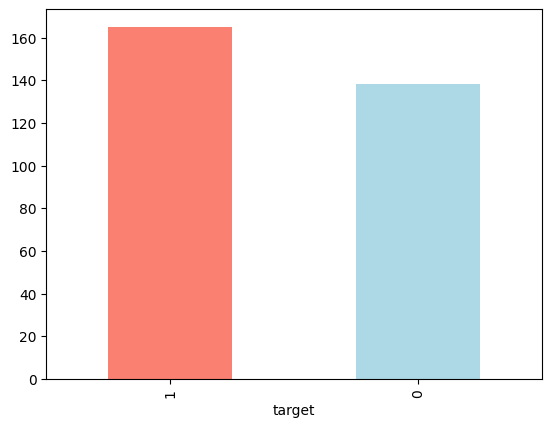

In [6]:
df['target'].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# looking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### finding patterns in our data

### heart disease frquency according to sex

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# compare target column wuth sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


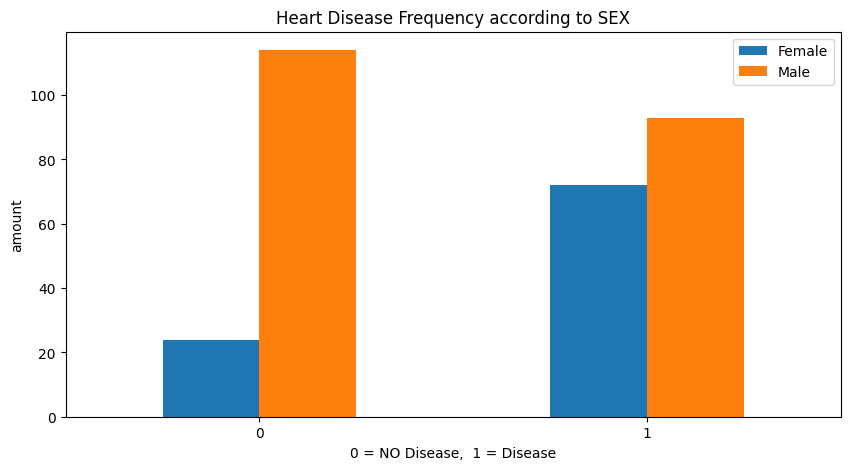

In [12]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,5))
plt.title("Heart Disease Frequency according to SEX")
plt.xlabel("0 = NO Disease,  1 = Disease")
plt.ylabel("amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [13]:
df['thalach'].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

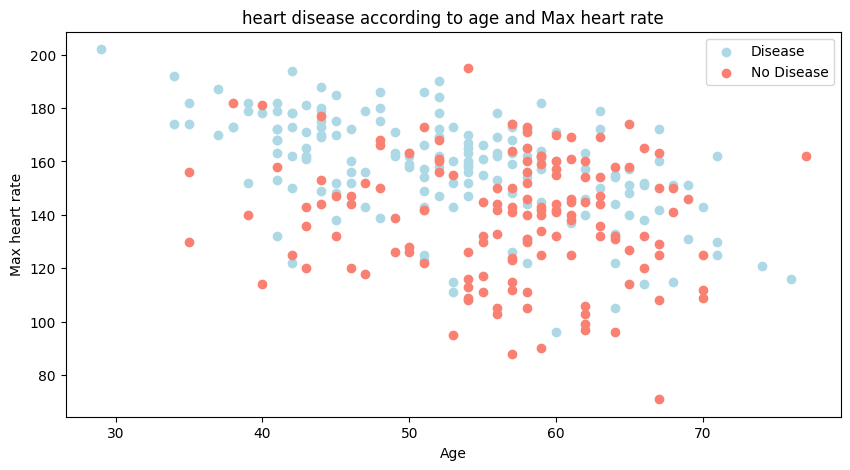

In [14]:
# age vs max heart rate
plt.figure(figsize=(10,5))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="lightblue")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="salmon")
plt.title("heart disease according to age and Max heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No Disease"]);


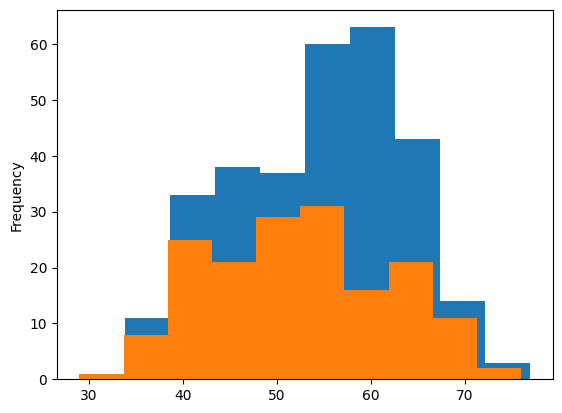

In [15]:
# check the distribution of the age column with histogram
df.age.plot.hist()
df.age[df.target==1].plot.hist();

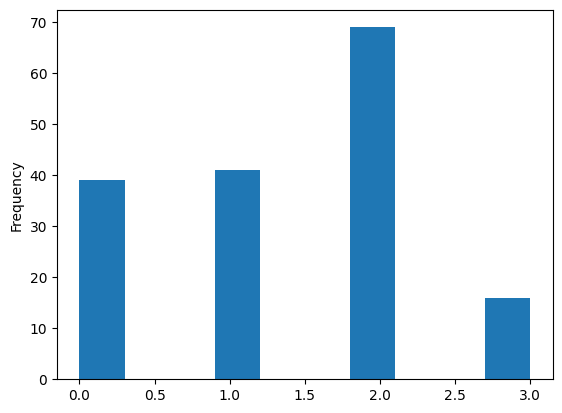

In [16]:
df.cp[df.target==1].plot.hist();

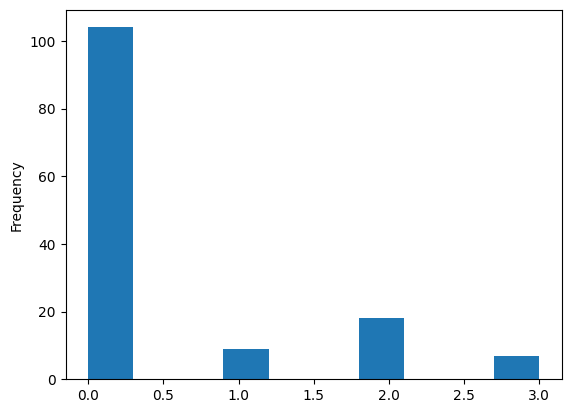

In [17]:
df.cp[df.target==0].plot.hist();

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


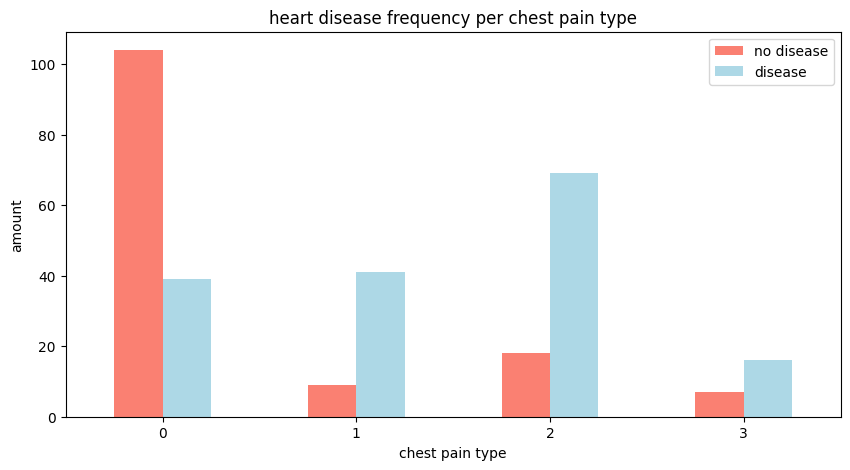

In [19]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,5),color=["salmon","lightblue"],)
plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no disease","disease"])
plt.xticks(rotation=0);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### building a correlation matrix

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


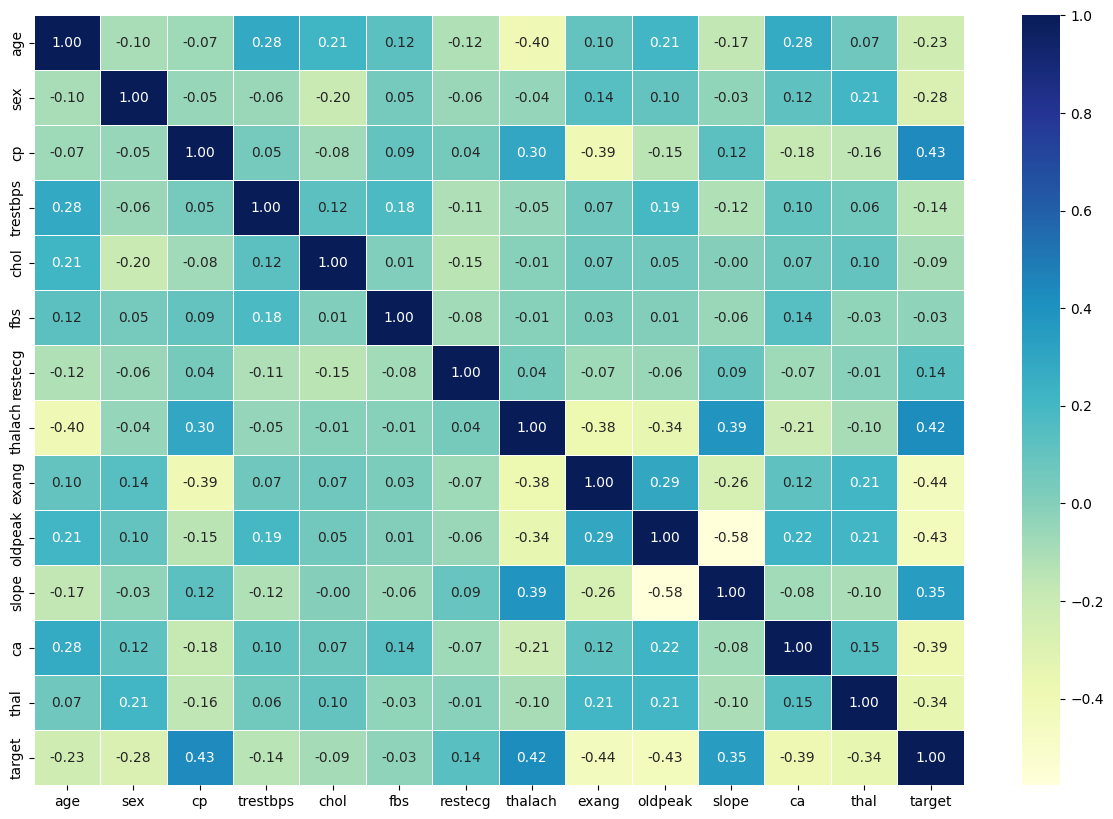

In [22]:
#sns.heatmap(df.corr())
corr_matrix = df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlGnBu")

### Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# split data into X and Y
X=df.drop("target",axis=1)
Y=df["target"]

In [25]:
 # split data into train and test sets
np.random.seed(42)

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

### choosing the right ML model for our problem
it is a classification problem

In [26]:
models={
    "logistic regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "RandomForest":RandomForestClassifier()}

# create a function to fit and score the model
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    # set random seed
    np.random.seed(42)
    # loop through models
    model_scores={}
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train,Y_train)
        # evaluate the model and appends its score to model_scores
        model_scores[name] = model.score(X_test,Y_test)

    return model_scores

In [27]:
model_scores=fit_and_score(models,X_train,X_test,Y_train,Y_test)
model_scores

c:\Users\kirol\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

### model comparisons

<Axes: >

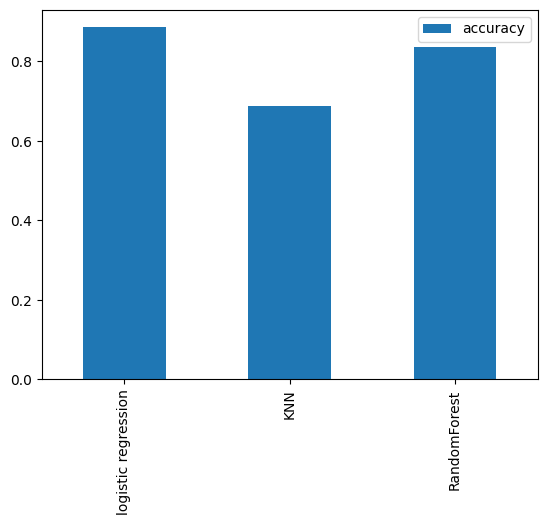

In [28]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar()

### Tuning and improving our model
>1- hyperparameter tuning\
2- feature importance\
3- confusion matrix\
4- cross-validation\
5- precision\
6- recall\
7- F1 score\
8- classification report
9- ROC curve\
10- area under the curve (AUC)\

In [29]:
# hyperparameter tuning
# KNN
train_scores=[]
test_scores=[]

neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, Y_train)

    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))



In [30]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [31]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN score on the test data:75.41


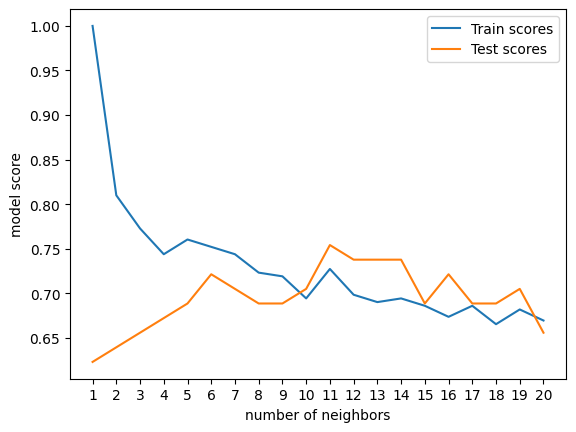

In [32]:
plt.plot(neighbors, train_scores,label="Train scores")
plt.plot(neighbors, test_scores,label="Test scores")
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.xticks(np.arange(1,21))
plt.legend()
print(f"maximum KNN score on the test data:{max(test_scores)*100:.2f}")


### hyperparameter tuning
 logistic regression and randomForestclassifier using randomizedsearchCV

In [33]:
# create hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

#create hyperparameter grid for RandomForestclassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,1)}

In [34]:
np.random.seed(42)

# setup random hyperparameter search for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
# fit random hyperparameter search model for logistic regression
rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.score(X_test, Y_test)

0.8852459016393442

### tuning randomforestclassifier

In [36]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

In [37]:
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [38]:
rs_rf.score(X_test, Y_test)

0.8688524590163934

### GridSearchCV
hyperparameter tuning using GridSearchCV on our LogisticRegression model

In [39]:
model_scores

{'logistic regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

In [40]:
#create hyperparameter grid for the logistic regression
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [41]:
gs_log_reg.score(X_test, Y_test)

0.8852459016393442

### Evaluating our ML model
>1- ROC curve and AUC curve\
2- confusion matrix\
3- classification report\
4- precision\
5- recall\
6- f1-score\

to make comparisons and evalute our trained model, first we have to make predictions

### 1- ROC curve and AUC 

In [42]:
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

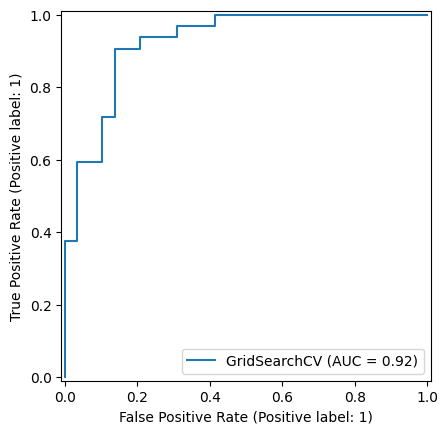

In [44]:
# plotting ROC curve and calculate the AUC metric
RocCurveDisplay.from_estimator(gs_log_reg,X_test,Y_test)

### 2- confusion matrix

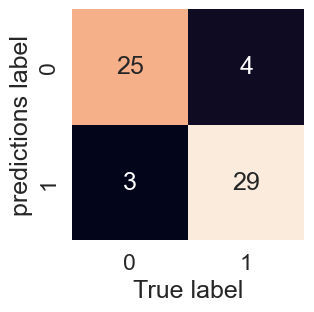

In [45]:
sns.set(font_scale=1.5)
def plot_confusion_matrix(Y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(Y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predictions label")
plot_confusion_matrix(Y_test,y_preds)

### 3- classification Report

In [46]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross-validation

In [47]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

In [49]:
# CV accuracy
cv_acc=cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [50]:
# CV precision
cv_pre=cross_val_score(clf,X,Y,cv=5,scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8215873015873015

In [51]:
# CV recall
cv_rec=cross_val_score(clf,X,Y,cv=5,scoring="recall")
cv_rec=np.mean(cv_rec)
cv_rec

0.9272727272727274

In [52]:
# CV f1-score
cv_f=cross_val_score(clf,X,Y,cv=5,scoring="f1")
cv_f=np.mean(cv_f)
cv_f

0.8705403543192143

### visualize cross validation metrics

<Axes: title={'center': 'Cross Validation classification metrics'}>

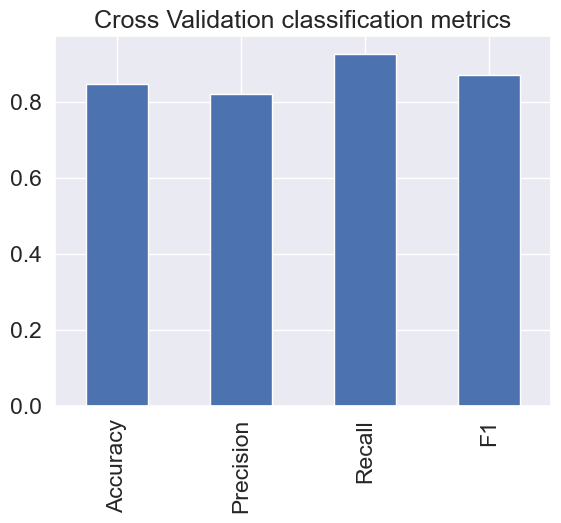

In [53]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_rec,
                         "F1":cv_f},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross Validation classification metrics",legend=False)

### Feature Importance
which features contributed the most to the outcomes of the model

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
# fit an instance of logistic regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [57]:
clf=LogisticRegression(C=0.20433597178569418,solver="liblinear")
clf.fit(X_train, Y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [58]:
# check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [59]:
# match coefs of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

<Axes: title={'center': 'Feature importance'}>

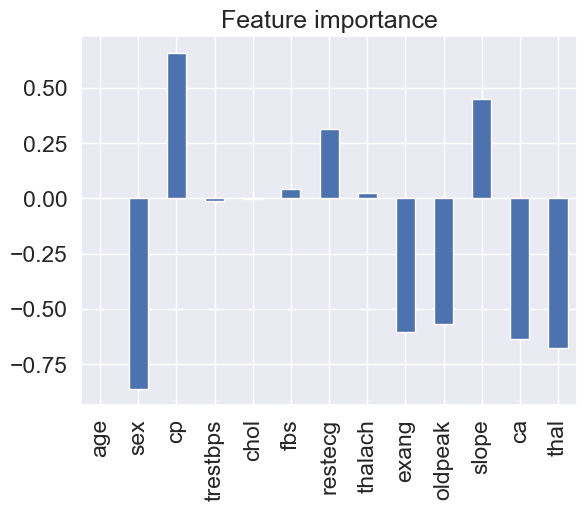

In [62]:
# visualize features importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False)